# Benutzung von Lobbyradar

Zu erst muss mal die Datei "Graph" und deren Funktionen importiert werden. Wichtig zu wissen ist das die libraries _pymongo_, _bson_, _rdflib_, _networkx_ und _matplotlib_ vorhanden sind.

In [ ]:
import Graph
from Graph import search_persons, person_connections,  \
                  search_organizations, \
                  organization_connections, plot_tripples, \
                  search_governmental, search_sparql
%matplotlib inline # um schöne plotts zu erhalten

Mit der Methode __search_persons__ kann mit freitext nach Personen gesucht werden.

In [6]:
search_persons(name="angela m", limit=10)

[u'Angela Merkel', u'Angela Marquardt']

Hat man den korrekten Namen der Person, kann mit Hilfe der Methode __person_connections__ nach "connections" also organisationen gesucht werden. Es wird eine Liste von Triples mit ('personenname', 'property', 'Organisationslabel') zurück gegeben.

In [7]:
angela_connections = person_connections("Angela Merkel")
angela_connections[:2]

[(u'Angela Merkel',
  u'http://example.org/isOtherwiseRelatedToGovernment',
  u'Bundeskanzleramt'),
 (u'Angela Merkel',
  u'http://example.org/isOtherMemberOf',
  u'Atlantik-Br\xfccke e.V.')]

Die Methode __plot_tripples__ visualisiert nun die tripples in einem Graphen. Dabei werden die "Objekte" Grün und die "Subjekte" rot dargestellt. In unserem Fall sind die Personen grün und die Organisationen rot dargestellt.

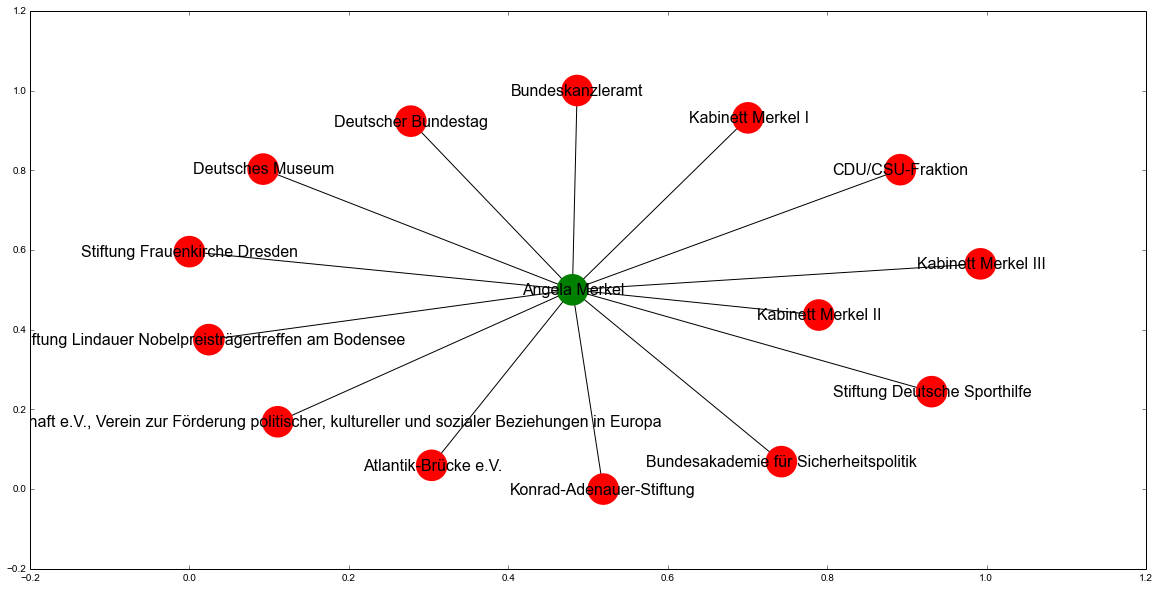

In [9]:
plot_tripples(angela_connections)

Mit der Methode __search_organizations__ kann freitext nach Organisationen gesucht werden.

In [12]:
search_organizations("SPD")

[u'SPD', u'SPD-NRW', u'SPD-Bundestagsfraktion', u'SPD Vorpommern']

Nun kann mit der Methode __organization_connections__ nach Personen-Verbindungen dieser Organisation gesucht werden.
Zurück kommt wieder ein Tripple. Analog zur Methode __person_connections__

In [13]:
org_conn_tripple = organization_connections("SPD-Bundestagsfraktion")
org_conn_tripple[:4]

[(u'Bernhard Daldrup',
  u'http://example.org/isOtherMemberOf',
  u'SPD-Bundestagsfraktion'),
 (u'Gabriele Hiller-Ohm',
  u'http://example.org/isOtherMemberOf',
  u'SPD-Bundestagsfraktion'),
 (u'Daniela De Ridder',
  u'http://example.org/isOtherMemberOf',
  u'SPD-Bundestagsfraktion'),
 (u'Nina Dr. Nina Scheer',
  u'http://example.org/isOtherMemberOf',
  u'SPD-Bundestagsfraktion')]

Diese können dann wieder mit der Methode __plot_tripples__ geplotted werden. Wenn der Graphen zu gross wird, kann die grösse des plotts selbst über figsize angegeben werden.

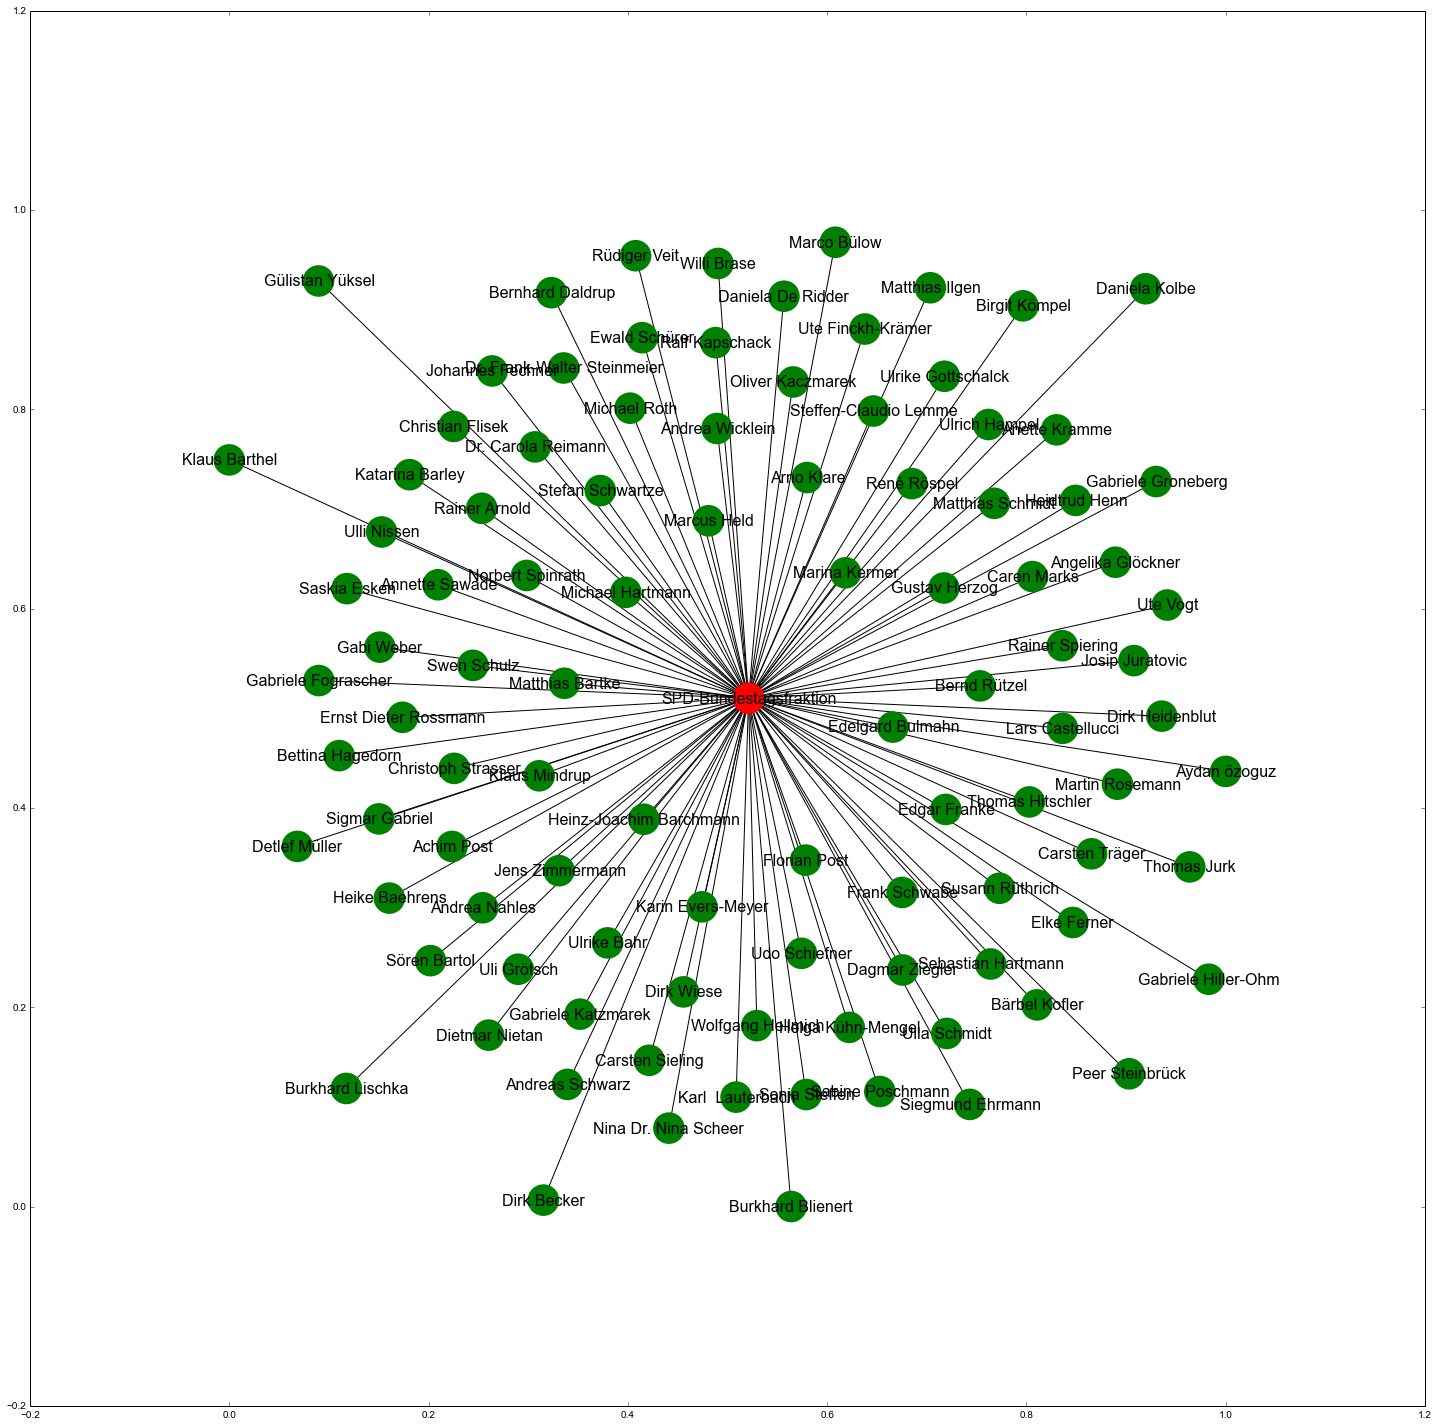

In [14]:
plot_tripples(org_conn_tripple, figsize=(25,25))

Mit der Methode __search_govenrmental__ kann ausschliesslich nach Bundesorganisationen gesucht werden.

In [15]:
gov_organizations = search_governmental()
gov_organizations[:10]

[u'Nieders\xe4chsisches Kultusministerium',
 u'Bayrisches Staatsministerium f\xfcr Ern\xe4hrung, Landwirtschaft und Forsten',
 u'Bayrisches Staatsministerium f\xfcr Arbeit und Soziales, Familie und Integration',
 u'Ministerium f\xfcr Inneres und Kommunales Nordrhein-Westfalen',
 u'Hessisches Ministerium der Finanzen',
 u'Staatsministerium Baden-W\xfcrttemberg',
 u'Ministerium f\xfcr Landwirtschaft, Umwelt und Verbraucherschutz Mecklenburg-Vorpommern',
 u'Staatskanzlei Sachsen-Anhalt',
 u'Nieders\xe4chsisches Ministerium f\xfcr Ern\xe4hrung, Landwirtschaft und Verbraucherschutz',
 u'Ministerium f\xfcr Schule und Weiterbildung  Nordrhein-Westfalen']

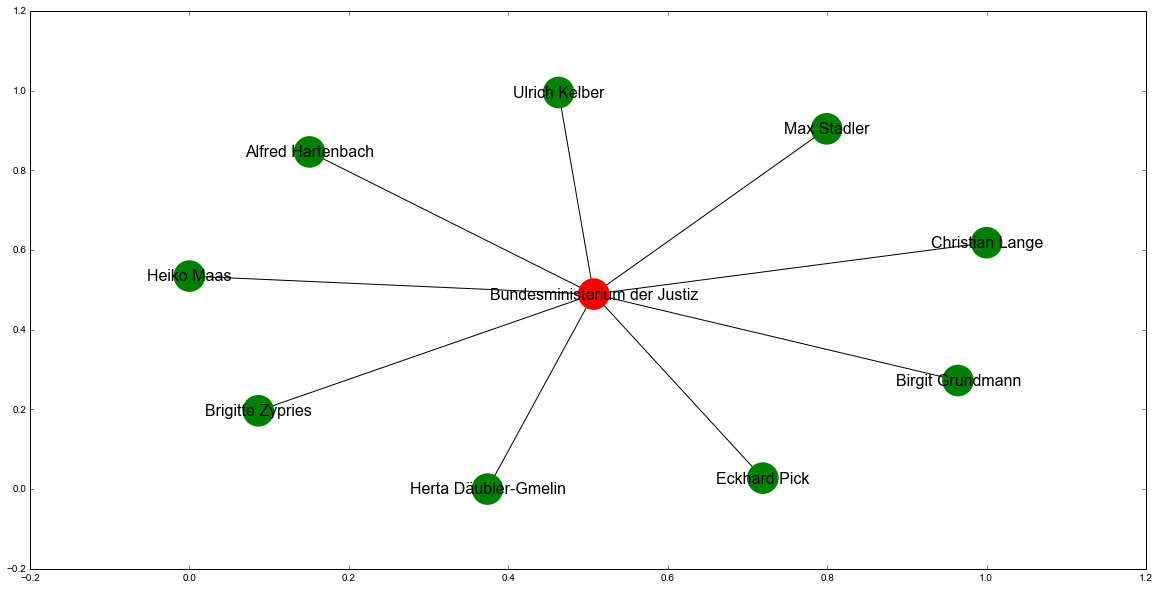

In [16]:
plot_tripples(organization_connections("Bundesministerium der Justiz"))

Mit der Methode __search_sparql__ kann ein eigenes Sparql querie abgeschickt werden. zurück erhält man ein rdflib query resultat. Dieses kann dann selbst nach belieben verwendet werden.

Z.B. Kann die Ontologie analysiert werden.

In [17]:
res = search_sparql(""" 
    SELECT DISTINCT ?property ?subproperty
    WHERE {
        ?subproperty rdfs:isSubPropertyOf ?property .
    }
    LIMIT 100
""")

for row in res:
    print("%s -> %s" % row)

http://example.org/isMemberOf -> http://example.org/isOtherMemberOf
http://example.org/isMemberOf -> http://example.org/isOrdinaryMemberOf
http://example.org/isExecutiveOf -> http://example.org/isChairmanOfManagementOf
http://example.org/isExecutiveOf -> http://example.org/isAdministrationBoardMemberOf
http://example.org/isExecutiveOf -> http://example.org/isManagementMemberOf
http://example.org/isExecutiveOf -> http://example.org/isDirectorOf
http://example.org/isMemberOf -> http://example.org/isRelatedToGovernment
http://example.org/isExecutiveOf -> http://example.org/isChairmanOfDirectorsBoardOf
http://example.org/isRelatedToGovernment -> http://example.org/isJusticeMinisterOf
http://example.org/isMemberOf -> http://example.org/isRepresentativeMemberOf
http://example.org/isRelatedToGovernment -> http://example.org/isRepresentativeOfFederalChancellor
http://example.org/isExecutiveOf -> http://example.org/isVicePresidentOf
http://example.org/isRelatedToGovernment -> http://example.org